<font size="+5">#03. Arboles de Decision</font>

<ul>
    <li>Resolver dudas → Pregunta en <img src="https://discord.com/assets/f9bb9c4af2b9c32a2c5ee0014661546d.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutoriales → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Reservar Clases → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Cargar Datos

Usamos la base de datos del **CIS** sobre una muestra de 2455, cuyas características son de aspecto sociológico. El `objetivo es determinar si una persona usa internet o no`.

```python
df = pd.read_csv('https://raw.githubusercontent.com/sotastica/data/main/uso_internet_espana.csv')
df.head()
```

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sotastica/data/main/uso_internet_espana.csv')
df.head()

,uso_internet,sexo,edad,estudios
0,0,Mujer,66,Primaria
1,1,Hombre,72,Primaria
2,1,Hombre,48,Medios universitarios
3,0,Hombre,59,Superiores
4,1,Mujer,44,Superiores


# Transformación de los Datos

> 1. Las variables categóricas tienen valores de tipo `string` u `object`. Podéis consultarlo con `df.dtypes`.
> 2. El modelo no puede optimizarse si hay columnas de dichos tipos.
> 3. Deberíamos convertir las columnas categóricas a 0s y 1s. Es decir, **Variables Dummy**. Para ello, usaremos la función `pd.get_dummies(df)`.

In [3]:
pd.get_dummies(df)

,uso_internet,edad,sexo_Hombre,sexo_Mujer,estudios_F.P.,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
0,0,66,0,1,0,0,1,0,0,0
1,1,72,1,0,0,0,1,0,0,0
2,1,48,1,0,0,1,0,0,0,0
3,0,59,1,0,0,0,0,0,0,1
4,1,44,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2450,1,43,1,0,0,0,1,0,0,0
2451,1,18,0,1,0,0,0,1,0,0
2452,0,54,0,1,0,0,1,0,0,0
2453,1,31,1,0,0,0,0,1,0,0


# Seleccionar Variables

> 1. `Variable Objetivo y`
> 2. El resto las usaremos como `Variables Explicativas X`

In [7]:
objetivo= df['uso_internet']
explicativas = df.drop(columns='uso_internet')

# Entrenar Modelo `DecisionTreeClassifier()`

> Antes de irte a la torera a buscar lo que hemos visto durante la sesión. Piensa que:
>
> 1. Solo queremos importar una cosa; el objeto `DecisionTreeClassifier`.
> 2. Por tanto: `from ... import DecisionTreeClassifier()`
> 3. Tan solo tienes que pensar qué colocar en lugar de `...`. Teniendo en cuenta que la librería de `sklearn` contiene todo lo relacionado con los modelos de **Machine Learning**.
> 4. **Disciplina Sotástica:** Puedes usar el tabulador `tab` para que Python te vaya sugiriendo...

In [29]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier(max_depth=3)
explicativas = pd.get_dummies(data=explicativas, drop_first=True)
model.fit(y=objetivo, X=explicativas)

DecisionTreeClassifier(max_depth=3)

# Visualizar Modelo

> 1. Usaremos la función `plot_tree()`, que se encuentra en el módulo `tree` de la librería `sklearn`
> 2. Podéis usar `shift + tab` para que `Python` os explique cómo usar la función `plot_tree()`

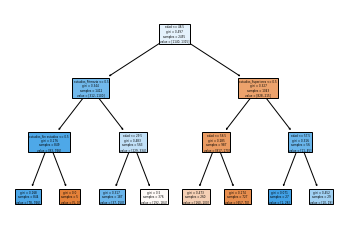

In [30]:
from sklearn.tree import plot_tree
plot_tree(decision_tree=model, feature_names=explicativa.columns, filled=True);

# Explicación Algoritmo Árbol de Decisión

> _Durante la corrección te explicare en detalle el funcionamiento de este algoritmo. Mientras tanto, podéis ver el vídeo que usaré para que os relacionéis con los conceptos:_
>
> - https://www.youtube.com/watch?v=7VeUPuFGJHk

# Interpretar Modelo

> - ¿Cómo se ha situado la variable en el **Nodo Raíz**? ¿Es la **variable más importante**? ¿Por qué?

# Realizar Predicciones

> ¿No crees que si existe un modelo para calcular la ecuación matemática del árbol, probablemente habrá otro para **aplicar la ecuación matemática** sustituyendo por las variables de entrada, `explicativas X`?

# Realidad vs Predicciones

> ¿Cómo de bueno es nuestro modelo?
>
> 1. Si pasamos las predicciones como una nuevo columna del `DataFrame`, podremos observar que **las predicciones de nuestro modelo pueden no coincidir con la realidad**.
>
>    - `df['pred'] = predicciones`
>
> 2. ¿Cómo medimos el **error de nuestro modelo**? ¿Cómo de bueno es nuestro modelo para describir la realidad?
>    - `df.sample(10)` para comprobar si las predicciones de nuestro modelo coinciden con la realidad...

In [12]:
df.insert(0, 'pred', model.predict(X=explicativa))

In [32]:
df.insert(0, 'pred_prob', model.predict_proba(X=explicativa)[:, 1])

In [33]:
df

,pred_prob,pred,uso_internet,sexo,edad,estudios
0,0.096286,0,0,Mujer,66,Primaria
1,0.096286,0,1,Hombre,72,Primaria
2,0.907583,1,1,Hombre,48,Medios universitarios
3,0.655172,0,0,Hombre,59,Superiores
4,0.907583,1,1,Mujer,44,Superiores
...,...,...,...,...,...,...
2450,0.489362,0,1,Hombre,43,Primaria
2451,0.907583,1,1,Mujer,18,Secundaria
2452,0.384615,0,0,Mujer,54,Primaria
2453,0.907583,1,1,Hombre,31,Secundaria


In [14]:
comp = df.uso_internet == df.pred

In [16]:
comp.mean()

0.859877800407332

In [20]:
comp

0        True
1       False
2        True
3        True
4        True
        ...  
2450    False
2451     True
2452     True
2453     True
2454     True
Length: 2455, dtype: bool

# Matriz de Confusión

> 1. Usar la función `confusion_matrix()`, o `plot_confusion_matrix()`
> 2. ¿Qué representa cada número?

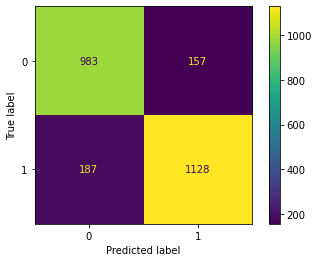

In [22]:
from sklearn.metrics import plot_confusion_matrix,classification_report
plot_confusion_matrix(estimator=model, X=explicativa, y_true=objetivo);

# Otrás Métricas

> Siempre tomaremos como `referencia la realidad (por filas)`. Imaginando que estamos prediciendo si una persona tiene COVID o no, nos preguntaremos:

## Sensitividad

> - Dentro de las personas que, realmente, `tienen COVID (1)`, cuántas predice nuestro modelo como que tienen COVID (1)?

In [24]:
1128/(187 + 1128)

0.8577946768060837

## Especificidad

> - Dentro de las personas que, realmente, `NO tienen COVID (0)`, cuántas predice nuestro modelo como que NO tienen COVID (0)?

In [25]:
983/(983 + 157)

0.862280701754386

## Classification Report

> 1. Usaremos la función `classification_report()`
> 2. Guardamos el objeto resultante en `reporte`
> 3. Coinciden algunos de los números de la tabla, `print(reporte)`, con los que hemos calculado anteriormente?

In [27]:
from sklearn.metrics import classification_report

report = classification_report(y_true = objetivo, y_pred = df.pred)

In [28]:
print(report)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1140
           1       0.88      0.86      0.87      1315

    accuracy                           0.86      2455
   macro avg       0.86      0.86      0.86      2455
weighted avg       0.86      0.86      0.86      2455



## Curva ROC

> - Usaremos la función `plot_roc_curve()`
>
> _PD: Durante la corrección te explicare en detalle el funcionamiento la Curva ROC. Mientras tanto puedes hacer uso del vídeo que usaré:_
>
> - https://www.youtube.com/watch?v=7VeUPuFGJHk

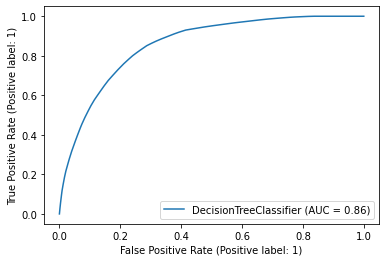

In [25]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(estimator=model, X=explicativa, y=objetivo)

# Objetivos Alcanzados

_Haz doble click sobre esta celda y pon una `X` dentro de las casillas [X] si crees que has superado los objetivos:_

- [ ] Entender cómo se usan los **Algoritmos de Árboles**.
- [ ] Entender otra forma de **comparar los datos reales con las predicciones** del modelo.
- [ ] No todas las visualizaciones de modelos son iguales. En este caso también podemos **visualizar un árbol** para interpretar el modelo.
- [ ] Distinguir el papel de la **probabilidad** a la hora de optimizar este tipo de modelos.
- [ ] Saber determinar **por qué una variable es importante** en el modelo. Es decir, por qué aporta diferencias significativas.
- [ ] Entender la necesidad de **normalizar** los datos.